# Trader Performance vs Market Sentiment (Fear & Greed)

## Objective
Analyze how Bitcoin market sentiment (Fear/Greed) impacts trader behavior and performance on Hyperliquid.

## Datasets
- Bitcoin Fear & Greed Index
- Hyperliquid Historical Trader Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


In [6]:
sentiment = pd.read_csv("/content/sample_data/fear_greed.csv")
trades = pd.read_csv("/content/sample_data/hyperliquid_trades.csv")


## Data Overview


In [7]:
print("Sentiment Data")
display(sentiment.head())
sentiment.info()
sentiment.isnull().sum()
sentiment.duplicated().sum()


Sentiment Data


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


np.int64(0)

In [8]:
print("Trade Data")
display(trades.head())
trades.info()
trades.isnull().sum()
trades.duplicated().sum()


Trade Data


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

np.int64(0)

In [9]:
trades['time'] = pd.to_datetime(trades['time'])
trades['date'] = trades['time'].dt.date

sentiment['Date'] = pd.to_datetime(sentiment['Date'])
sentiment['date'] = sentiment['Date'].dt.date


KeyError: 'time'

In [10]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [11]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [13]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

trades['date'] = trades['Timestamp IST'].dt.date


In [15]:
df = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [16]:
df['classification'].value_counts()


,count
classification,


In [17]:
sentiment['classification'].value_counts()


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [18]:
df['classification'].isna().sum()


np.int64(211224)

In [19]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.normalize()
trades['date'] = pd.to_datetime(trades['date'])


In [20]:
df = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [21]:
df['classification'].value_counts(dropna=False)


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400
NaN,6


## Analysis: Performance vs Market Sentiment


In [23]:
df.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification'],
      dtype='object')

In [24]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)


In [25]:
df['win'] = df['closed_pnl'] > 0


In [26]:
avg_pnl = df.groupby('classification')['closed_pnl'].mean()
avg_pnl


,closed_pnl
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


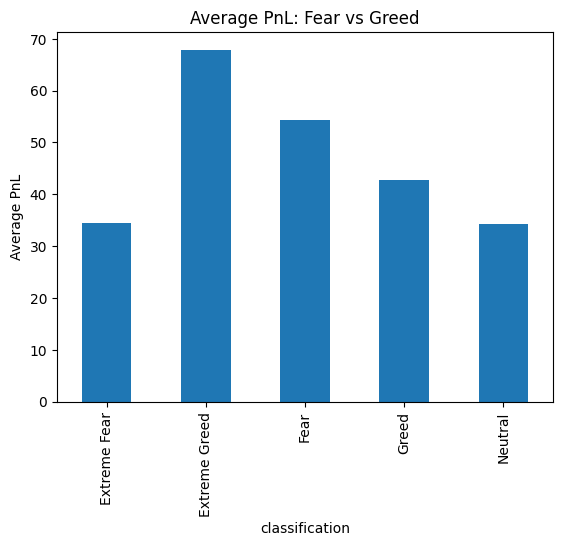

In [27]:
avg_pnl.plot(kind='bar', title='Average PnL: Fear vs Greed')
plt.ylabel("Average PnL")
plt.show()


In [28]:
win_rate = df.groupby('classification')['win'].mean()
win_rate


,win
classification,
Extreme Fear,0.370607
Extreme Greed,0.464943
Fear,0.420768
Greed,0.384828
Neutral,0.396991


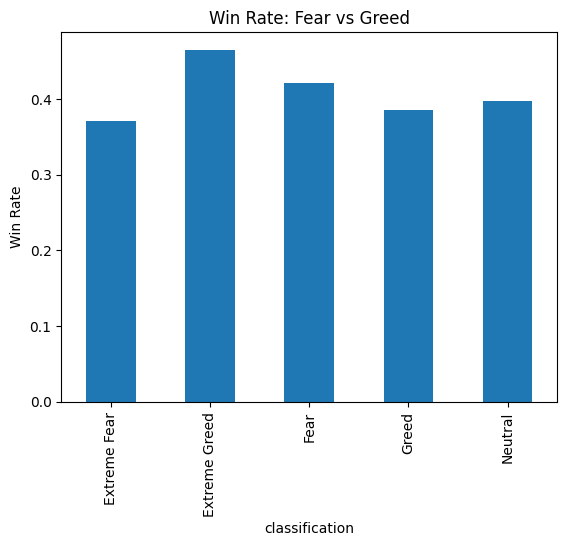

In [29]:
win_rate.plot(kind='bar', title='Win Rate: Fear vs Greed')
plt.ylabel("Win Rate")
plt.show()


In [30]:
df.groupby('classification').size()


,0
classification,
Extreme Fear,21400
Extreme Greed,39992
Fear,61837
Greed,50303
Neutral,37686


In [31]:
df.groupby('classification')['size_tokens'].mean()


,size_tokens
classification,
Extreme Fear,1675.893319
Extreme Greed,8832.415746
Fear,2992.641845
Greed,4715.327756
Neutral,4383.368714


In [35]:
df.groupby('classification')['size_usd'].mean()


,size_usd
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


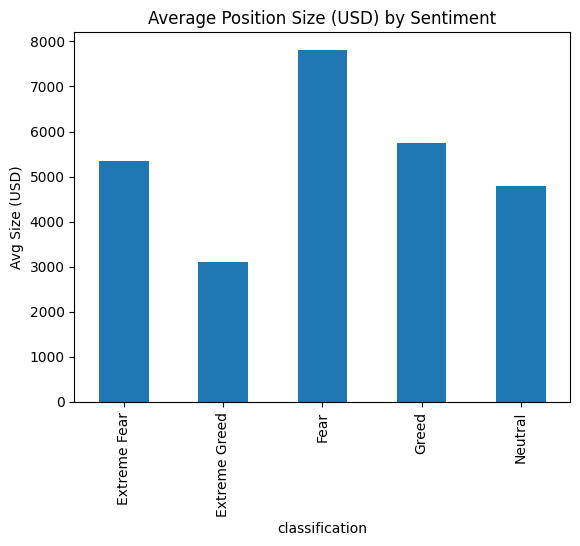

In [36]:
df.groupby('classification')['size_usd'].mean().plot(
    kind='bar',
    title='Average Position Size (USD) by Sentiment'
)
plt.ylabel("Avg Size (USD)")
plt.show()


In [37]:
direction_table = (
    df.groupby(['classification', 'side'])
    .size()
    .unstack(fill_value=0)
)

direction_table


side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


In [38]:
direction_table['long_short_ratio'] = (
    direction_table['BUY'] / (direction_table['SELL'] + 1)
)

direction_table


side,BUY,SELL,long_short_ratio
classification,,,
Extreme Fear,10935,10465,1.044812
Extreme Greed,17940,22052,0.813495
Fear,30270,31567,0.958882
Greed,24576,25727,0.955224
Neutral,18969,18717,1.013410


In [39]:
trade_count = df.groupby('classification').size()
trade_count


,0
classification,
Extreme Fear,21400
Extreme Greed,39992
Fear,61837
Greed,50303
Neutral,37686


In [40]:
median_size = df['size_usd'].median()

df['risk_group'] = np.where(
    df['size_usd'] > median_size,
    'High Risk',
    'Low Risk'
)


In [41]:
df.groupby(['classification', 'risk_group'])['closed_pnl'].mean()


classification  risk_group
Extreme Fear    High Risk      61.196379
                Low Risk        1.157202
Extreme Greed   High Risk     140.570044
                Low Risk        9.628661
Fear            High Risk      97.025581
                Low Risk        3.580906
Greed           High Risk      84.301244
                Low Risk        3.609685
Neutral         High Risk      69.581271
                Low Risk        2.188668
Name: closed_pnl, dtype: float64

## Risk-Based Performance Analysis

During **Greed** sentiment, **High Risk traders** achieve higher average profits,  
indicating that aggressive position sizing benefits from favorable market momentum.

However, during **Fear** sentiment, **High Risk traders** underperform, showing larger losses,  
while **Low Risk traders** preserve capital more effectively.
